### ARC Species for the ML TS module

- clone ARC from https://github.com/ReactionMechanismGenerator/ARC and add it to your python path so we can import modules from ARC
- also be sure that RMG is added to your python path for the same reason

In [1]:
import numpy as np
import os
import scipy
import sklearn
import sys

In [2]:
from arc.species.species import ARCSpecies, enumerate_bonds
from arc.plotter import draw_structure, plot_3d_mol_as_scatter
import arc
%matplotlib inline

# We normally don't define species using xyz (ARC will determine it),
# but here we'd like to make sure that atom ordering is the same.
# ARC will preserve the xyz atom order as well as the RMG Molecule object created from it.
# I also defined SMILES, but it's not necessary (used for isomorphism check with the preceived connectivity)
# The created RMG Molecule object (stored in spc.mol) is created with the same atom order as in the given xyz.

xyz1 = """
C       2.48681185    0.74219788    0.29129615
C       1.29524181    0.18715038   -0.40777838
C       1.46444739   -0.47980720   -1.73736780
C       0.16705606   -0.55907814   -2.54092821
C      -0.36446443    0.80716478   -2.95523113
O      -1.52380810    0.62255823   -3.75896487
H       2.16965544    1.37829949    1.12297519
H       3.09112758    1.35063778   -0.38769069
H       3.10507890   -0.06601540    0.69197818
H      -1.84750558    1.50817592   -3.99677266
H       0.40069838   -0.01072042    0.17544185
H       2.22318045    0.04927747   -2.32572179
H       1.83755199   -1.49649681   -1.56779399
H      -0.60479748   -1.09591403   -1.97441015
H       0.34025028   -1.16121577   -3.44207305
H       0.37976603    1.35391729   -3.54296385
H      -0.64345729    1.40814259   -2.08442448"""

xyz2 = """C      -2.46980163   -0.12577955    0.55549609
C      -1.31178104    0.17111718   -0.38385509
C      -1.31218791    1.63372953   -0.82856447
C      -0.14249660    1.92946952   -1.77612989
C      -0.14107412    3.41360663   -2.22873160
O       0.89700906    3.56663441   -3.03638466
H      -3.43036007    0.06844820    0.06770664
H      -2.41124229    0.49137146    1.45773236
H      -2.45027007   -1.17661693    0.86089972
H      -0.36855204   -0.06395850    0.12282599
H      -1.38205507   -0.48455267   -1.25954086
H      -2.25951647    1.86383944   -1.33106784
H      -1.24569851    2.28455893    0.05171502
H      -0.21648654    1.26397688   -2.64824672
H       0.79894922    1.68536973   -1.26325779
H      -0.16879119    4.00888836   -1.30213259
H      -1.14694094    3.60296809   -2.63627032"""

spc1 = ARCSpecies(label='4-pentynol', smiles='C[CH]CCCO', xyz=xyz1)
spc2 = ARCSpecies(label='pentane_1ox', smiles='CCCCC[O]', xyz=xyz2)


In [3]:
# we can list all bonds in 2 ways (though this isn't that helpful bc the dictionary isn't ordered)
spc1.mol.enumerate_bonds()
enumerate_bonds(spc1.mol)

{'C-C': 4, 'C-O': 1, 'C-H': 10, 'H-O': 1}

In [4]:
draw_structure(spc1.get_xyz())
draw_structure(spc2.get_xyz())

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
# check symbol order (doesn't guarantee that all C's and all H's are ordered correctly)
for atom1, atom2 in zip(spc1.mol.atoms, spc2.mol.atoms):
    if atom1.element.symbol != atom2.element.symbol:
        print('order is incorrect')
        break
else:
    print('symbol order between mol1 and mol2 is correct')

for atom1, symbol2 in zip(spc1.mol.atoms, spc2.get_xyz()['symbols']):
    if atom1.element.symbol != symbol2:
        print('order is incorrect')
        break
else:
    print('symbol order between mol1 and xyz2 is correct')  

symbol order between mol1 and mol2 is correct
symbol order between mol1 and xyz2 is correct


In [6]:
[spc1.mol.get_bonds(bond) for bond in spc1.mol.atoms]

[{<Atom 'C.'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">,
  <Atom 'C'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">},
 {<Atom 'C.'>: <Bond "1.0">,
  <Atom 'C'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">,
  <Atom 'C'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">,
  <Atom 'O'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">,
  <Atom 'H'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">, <Atom 'H'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">},
 {<Atom 'O'>: <Bond "1.0">},
 {<Atom 'C.'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">},
 {<Atom 'C'>: <Bond "1.0">}]

In [7]:
# so I can get the total bond order for each atom. 
# may be useful as an atom feature for the network 
spc1.mol.atoms[2].get_total_bond_order()

4.0

In [8]:
N = spc1.number_of_atoms
# coords = euclidean_distances(np.array(spc1.conformers[0]['coords']))
coords = sklearn.metrics.pairwise.euclidean_distances(np.array(spc1.conformers[0]['coords']))

In [9]:
adjmat = np.zeros([spc1.number_of_atoms, spc1.number_of_atoms])

for i, a in enumerate(spc1.mol.atoms):
    for j, b in enumerate(spc1.mol.atoms):
        try:
            adjmat[i,j] = spc1.mol.get_bond(a, b).order
        except ValueError:
            pass

In [10]:
adjmat

array([[0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

**The line below replaces line 179 in featurization.py:** `D_r = Chem.Get3DDistanceMatrix(r_mol)`

So this is the bond featurization for the network aka just the bond distance.

In [11]:
D_r = arc.species.converter.xyz_to_dmat(spc1.get_xyz())
D_r

array([[0.        , 1.48883246, 2.57953541, 3.88536755, 4.32133504,
        5.70122797, 1.09403084, 1.09380974, 1.09362194, 6.14496249,
        2.22085065, 2.72000425, 2.98152787, 4.2508974 , 4.70837081,
        4.41762294, 3.98573905],
       [1.48883246, 0.        , 1.49708749, 2.52586387, 3.10299181,
        4.40080371, 2.12759063, 2.13993274, 2.13285435, 4.95003531,
        1.08605094, 2.13508454, 2.1152788 , 2.77682169, 3.45500278,
        3.46826021, 2.8391052 ],
       [2.57953541, 1.49708749, 0.        , 1.52814184, 2.54644977,
        3.7724972 , 3.4830218 , 2.79611258, 2.96050963, 4.4750441 ,
        2.23840236, 1.09625128, 1.09618433, 2.17199241, 2.15270917,
        2.79271485, 2.85097613],
       [3.88536755, 2.52586387, 1.52814184, 0.        , 1.52341086,
        2.39560001, 4.60304513, 4.10288203, 4.39622256, 3.23287504,
        2.78099824, 2.15500762, 2.1485578 , 1.09767635, 1.09755546,
        2.16999366, 2.17607099],
       [4.32133504, 3.10299181, 2.54644977, 1.523410

Test getting the aromaticity of each atom in the molecule. Seems to work fine

In [12]:
from rmgpy.molecule.resonance import generate_optimal_aromatic_resonance_structures

In [13]:
def get_aromatic_atom_indicies(molecule):
    # molecule must be an RMG Molecule object
    aromatic_atom_indices= list()
    for atom in resonance_structure.atoms:
        for bond in atom.edges.values():
            if bond.is_benzene():
                aromatic_atom_indices.append(resonance_structure.atoms.index(atom))
                break
    return aromatic_atom_indices     

In [14]:
spc = ARCSpecies(label='benzene', smiles='c1ccccc1', multiplicity=2, charge=0)
resonance_structure = generate_optimal_aromatic_resonance_structures(spc.mol)[0]
resonance_structure
D_r = arc.species.converter.xyz_to_dmat(spc.get_xyz())
D_r

array([[0.        , 1.39482592, 2.41590935, 2.78965183, 2.41590935,
        1.39482592, 1.08673001, 2.15460453, 3.40073487, 3.87638183,
        3.40073487, 2.15460452],
       [1.39482592, 0.        , 1.39482592, 2.41590935, 2.78965183,
        2.41590935, 2.15460453, 1.08673001, 2.15460452, 3.40073487,
        3.87638183, 3.40073487],
       [2.41590935, 1.39482592, 0.        , 1.39482591, 2.41590935,
        2.78965183, 3.40073487, 2.15460451, 1.08673001, 2.15460452,
        3.40073485, 3.87638184],
       [2.78965183, 2.41590935, 1.39482591, 0.        , 1.39482591,
        2.41590935, 3.87638184, 3.40073486, 2.15460451, 1.08673   ,
        2.1546045 , 3.40073486],
       [2.41590935, 2.78965183, 2.41590935, 1.39482591, 0.        ,
        1.39482591, 3.40073486, 3.87638184, 3.40073486, 2.1546045 ,
        1.08673   , 2.15460451],
       [1.39482592, 2.41590935, 2.78965183, 2.41590935, 1.39482591,
        0.        , 2.15460451, 3.40073488, 3.87638184, 3.40073486,
        2.15460452,

In [15]:
spc.mol.atoms

[<Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>]

In [16]:
# first 6 indices correspond to atoms that are aromatic
get_aromatic_atom_indicies(spc.mol)

[0, 1, 2, 3, 4, 5]

In [17]:
# try a more complex species
spc = ARCSpecies(label='drug', smiles='[O]OC(c1cc(ccc1OC)C(C)C)NC(C)C', multiplicity=2, charge=0)
spc

In [18]:
spc.number_of_atoms

40

In [19]:
# try getting info about whether each atom is aromatic
generate_optimal_aromatic_resonance_structures(spc.mol)

[Molecule(smiles="COC1C=CC(=CC=1C(NC(C)C)O[O])C(C)C")]

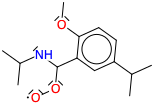

In [20]:
resonance_structure = generate_optimal_aromatic_resonance_structures(spc.mol)[0]
resonance_structure

In [21]:
spc.mol.atoms

[<Atom 'O'>,
 <Atom 'O'>,
 <Atom 'O.'>,
 <Atom 'N'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'C'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>,
 <Atom 'H'>]

In [22]:
aromatic_atom_indices = get_aromatic_atom_indicies(spc.mol)
aromatic_atom_indices

[12, 13, 14, 15, 16, 17]

In [23]:
[spc.mol.atoms[index] for index in aromatic_atom_indices]

[<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>]

Create `data` that is passed to the GNN. Similar to `molgraph2data` in featurization

- f_atoms is just a list of lists of atom featurs. It will form a square torch tensor
- f_bonds is just a list of lists of bond features. It will form a square torch tensor

In [24]:
from rdkit import Chem
from rdkit.Chem.rdchem import ChiralType
import torch
import torch_geometric as tg
from torch_geometric.data import Dataset, DataLoader
from tqdm import tqdm
from typing import List, Tuple, Union
import yaml

from model.G2C import G2C


# Atom feature sizes
ATOMIC_SYMBOLS = ['H', 'C', 'N', 'O']
ATOM_FEATURES = {
    'atomic_num': ATOMIC_SYMBOLS,
    'degree': [0, 1, 2, 3, 4, 5],
    'formal_charge': [-1, -2, 1, 2, 0],
    'chiral_tag': [0, 1, 2, 3], 
    'num_Hs': [0, 1, 2, 3, 4],
    'hybridization': [
        Chem.rdchem.HybridizationType.SP,
        Chem.rdchem.HybridizationType.SP2,
        Chem.rdchem.HybridizationType.SP3,
        Chem.rdchem.HybridizationType.SP3D,
        Chem.rdchem.HybridizationType.SP3D2
    ],
}
CHIRALTAG_PARITY = {
    ChiralType.CHI_TETRAHEDRAL_CW: +1,
    ChiralType.CHI_TETRAHEDRAL_CCW: -1,
    ChiralType.CHI_UNSPECIFIED: 0,
    ChiralType.CHI_OTHER: 0, # default
}

# len(choices) + 1 to include room for uncommon values; + 2 at end for IsAromatic and mass
ATOM_FDIM = sum(len(choices) + 1 for choices in ATOM_FEATURES.values()) + 2
BOND_FDIM = 7


def onek_encoding_unk(value: int, choices: List[int]) -> List[int]:
    """
    Creates a one-hot encoding.
    :param value: The value for which the encoding should be one.
    :param choices: A list of possible values.
    :return: A one-hot encoding of the value in a list of length len(choices) + 1.
    If value is not in the list of choices, then the final element in the encoding is 1.
    """
    encoding = [0] * (len(choices) + 1)
    index = choices.index(value) if value in choices else -1
    encoding[index] = 1

    return encoding


def atom_features(atom, #: rmgpy.molecule.molecule.Atom,
                  aromatic: bool = False,
                  functional_groups: List[int] = None
                 ) -> List[Union[bool, int, float]]:
    """
    Builds a feature vector for an atom.
    :param atom: An instance of rmgpy.molecule.molecule.Atom class.
    :param aromatic: Boolean for whether this atom is aromatic.
    :param functional_groups: A k-hot vector indicating the functional groups the atom belongs to.
    :return: A list containing the atom features.
    """

    features = onek_encoding_unk(atom.symbol, ATOM_FEATURES['atomic_num']) + \
                                [1 if aromatic else 0] + \
                                [atom.mass * 10]  # atom.mass [=] kg. Multiply by 10 (hectograms) to scale to similar range as other features
                            #        onek_encoding_unk(atom.GetTotalDegree(), ATOM_FEATURES['degree']) + \
                            #        onek_encoding_unk(atom.GetFormalCharge(), ATOM_FEATURES['formal_charge']) + \
                            #        onek_encoding_unk(int(atom.GetChiralTag()), ATOM_FEATURES['chiral_tag'])
                            # features +=  onek_encoding_unk(int(atom.GetTotalNumHs()), ATOM_FEATURES['num_Hs']) + \
                            #        onek_encoding_unk(int(atom.GetHybridization()), ATOM_FEATURES['hybridization']) + \
    if functional_groups is not None:
        features += functional_groups
    return features

For now, the atom features are:
- first 4 features are one hot for whether the atom is H, C, N, O plus an extra 1 feature for unknown atom not in HCNO
- next 1 feature is for one hot of aromatic or not
- last feature is numeric: atomic mass in kg/mol * 10 to scale to between 0.01 for H and 0.12 for C
Had to change the `atom_features` function from featurization to accomodate `rmgpy.molecule.molecule.Atom` class rather than RDKit

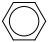

In [25]:
# try a simple dummy isomerization reaction
spc = ARCSpecies(label='benzene', smiles='c1ccccc1', multiplicity=2, charge=0)
reactant = spc
product = spc
resonance_structure = generate_optimal_aromatic_resonance_structures(spc.mol)[0]
resonance_structure

In [26]:
D_r = arc.species.converter.xyz_to_dmat(reactant.get_xyz())
D_p = arc.species.converter.xyz_to_dmat(product.get_xyz())
D_p

array([[0.        , 1.39482592, 2.41590935, 2.78965183, 2.41590935,
        1.39482592, 1.08673001, 2.15460453, 3.40073487, 3.87638183,
        3.40073487, 2.15460452],
       [1.39482592, 0.        , 1.39482592, 2.41590935, 2.78965183,
        2.41590935, 2.15460453, 1.08673001, 2.15460452, 3.40073487,
        3.87638183, 3.40073487],
       [2.41590935, 1.39482592, 0.        , 1.39482591, 2.41590935,
        2.78965183, 3.40073487, 2.15460451, 1.08673001, 2.15460452,
        3.40073485, 3.87638184],
       [2.78965183, 2.41590935, 1.39482591, 0.        , 1.39482591,
        2.41590935, 3.87638184, 3.40073486, 2.15460451, 1.08673   ,
        2.1546045 , 3.40073486],
       [2.41590935, 2.78965183, 2.41590935, 1.39482591, 0.        ,
        1.39482591, 3.40073486, 3.87638184, 3.40073486, 2.1546045 ,
        1.08673   , 2.15460451],
       [1.39482592, 2.41590935, 2.78965183, 2.41590935, 1.39482591,
        0.        , 2.15460451, 3.40073488, 3.87638184, 3.40073486,
        2.15460452,

In [31]:
f_atoms = list()        # atom (node) features
edge_index = list()     # list of tuples indicating presence of bonds
f_bonds = list()        # bond (edge) features

n_atoms = len(spc.mol.atoms)   # number of atoms
aromatic_atom_indices = get_aromatic_atom_indicies(spc.mol)  

for a1, atom in enumerate(spc.mol.atoms):
    # print(type(atom))  # of type: rmgpy.molecule.molecule.Atom
    aromatic = True if a1 in aromatic_atom_indices else False
    f_atoms.append(atom_features(atom, aromatic))
    
    # Edge features
    for a2 in range(a1 + 1, n_atoms):
        # fully connected graph
        edge_index.extend([(a1, a2), (a2, a1)])
        
        # for now, naively include distance both reac and prod
        b1_feats = [D_r[a1][a2], D_p[a1][a2]]
        b2_feats = [D_r[a2][a1], D_p[a2][a1]]
        
        f_bonds.append(b1_feats)
        f_bonds.append(b2_feats)
        
# print(edge_index)
f_atoms
# columns of the f_atoms output are:
# H, C, N, O, X, aromatic, mass in hectograms 

[[0, 1, 0, 0, 0, 1, 0.12010700069367886],
 [0, 1, 0, 0, 0, 1, 0.12010700069367886],
 [0, 1, 0, 0, 0, 1, 0.12010700069367886],
 [0, 1, 0, 0, 0, 1, 0.12010700069367886],
 [0, 1, 0, 0, 0, 1, 0.12010700069367886],
 [0, 1, 0, 0, 0, 1, 0.12010700069367886],
 [1, 0, 0, 0, 0, 0, 0.010079400381073356],
 [1, 0, 0, 0, 0, 0, 0.010079400381073356],
 [1, 0, 0, 0, 0, 0, 0.010079400381073356],
 [1, 0, 0, 0, 0, 0, 0.010079400381073356],
 [1, 0, 0, 0, 0, 0, 0.010079400381073356],
 [1, 0, 0, 0, 0, 0, 0.010079400381073356]]

In [38]:
data = tg.data.Data()
data.x = torch.tensor(f_atoms, dtype=torch.float)
data.edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
data.edge_attr = torch.tensor(f_bonds, dtype=torch.float)

In [41]:
# must define a batch attribute
data_list = [data, data, data]

loader = DataLoader(data_list, batch_size=20)
# data.batch = torch.tensor([0])

Try passing data through the model. It works! 😎

In [42]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# define paths
yaml_file_name = 'best_model/model_paramaters.yml'
state_dict = 'best_model/epoch_95_state_dict'

# create the network with the best architecture from hyperopt and load the corresponding best weights
with open(yaml_file_name, 'r') as f:
    content = yaml.load(stream=f, Loader=yaml.FullLoader)
model = G2C(**content).to(device)
model.load_state_dict(torch.load(state_dict, map_location=device))
model.eval()

for data in tqdm(loader):
    data = data.to(device)
    out, mask = model(data)
    print(out)

100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

tensor([[[0.0000, 1.4497, 2.3657, 2.7500, 2.3925, 1.3992, 1.1006, 2.1842,
          3.2826, 3.8212, 3.3789, 2.1601],
         [1.4497, 0.0000, 1.4267, 2.3895, 2.7449, 2.4016, 2.2576, 1.0838,
          2.2120, 3.3915, 3.6967, 3.3651],
         [2.3657, 1.4267, 0.0000, 1.3939, 2.3987, 2.7593, 3.3284, 2.1994,
          1.1063, 2.1728, 3.3701, 3.8486],
         [2.7500, 2.3895, 1.3939, 0.0000, 1.3846, 2.3878, 3.8174, 3.3800,
          2.1892, 1.0888, 2.1854, 3.3814],
         [2.3925, 2.7449, 2.3987, 1.3846, 0.0000, 1.3775, 3.3694, 3.8213,
          3.3861, 2.1157, 1.2169, 2.1491],
         [1.3992, 2.4016, 2.7593, 2.3878, 1.3775, 0.0000, 2.1633, 3.3666,
          3.8087, 3.3451, 2.1848, 1.0957],
         [1.1006, 2.2576, 3.3284, 3.8174, 3.3694, 2.1633, 0.0000, 2.5929,
          4.1107, 4.8742, 4.3087, 2.5088],
         [2.1842, 1.0838, 2.1994, 3.3800, 3.8213, 3.3666, 2.5929, 0.0000,
          2.5899, 4.3085, 4.7369, 4.2320],
         [3.2826, 2.2120, 1.1063, 2.1892, 3.3861, 3.8087, 4.1107

In [ ]:
# ignore this! it's from ts_gen_v1 using tensorflow 1.14
import numpy as np
import tensorflow as tf
from sklearn.metrics.pairwise import euclidean_distances

elements = "HCNO"
num_elements = len(elements)

def prepare_batch(batch_mols):

    # Initialization
    size = len(batch_mols)
    max_size = max([mol.number_of_atoms for mol in batch_mols])
    V = np.zeros((size, max_size, num_elements + 1), dtype=np.float32)
    E = np.zeros((size, max_size, max_size, 3), dtype=np.float32)
    sizes = np.zeros(size, dtype=np.int32)
    coordinates = np.zeros((size, max_size, 3), dtype=np.float32)

    # Build atom features
    for bx in range(size):
        reactant, product = batch_mols[bx]
        N_atoms = reactant.number_of_atoms
        sizes[bx] = int(N_atoms)

        # Topological distances matrix
        MAX_D = 10.
        D = (Chem.GetDistanceMatrix(reactant) + Chem.GetDistanceMatrix(product)) / 2
        D[D > MAX_D] = 10.

        r_dist_mat = euclidean_distances(np.array(reactant.conformers[0]['coords']))
        p_dist_mat = euclidean_distances(np.array(product.conformers[0]['coords']))
        D_3D_rbf = np.exp(-((r_dist_mat+p_dist_mat)/2))

        for i in range(N_atoms):
            # Edge features
            for j in range(N_atoms):
                E[bx, i, j, 2] = D_3D_rbf[i][j]
                if D[i][j] == 1.:  # if stays bonded
                    if reactant.GetBondBetweenAtoms(i, j).GetIsAromatic():
                        E[bx, i, j, 0] = 1.
                    E[bx, i, j, 1] = 1.

            # Recover coordinates; adapted for all
            # for k, mol_typ in enumerate([reactant, ts, product]):
#             pos = ts.GetConformer().GetAtomPosition(i)
#             np.asarray([pos.x, pos.y, pos.z])
#             coordinates[bx, i, :] = np.asarray([pos.x, pos.y, pos.z])

            # Node features
            e_ix = elements.index(conformers[0]['symbols'][i])
            V[bx, i, e_ix] = 1.
            V[bx, i, num_elements] = reactant.conformers[0]['isotopes'][i] / 10.  # careful with isotope behavior

    batch_dict = {
        "nodes": tf.constant(V),
        "edges": tf.constant(E),
        "sizes": tf.constant(sizes),
        "coordinates": tf.constant(coordinates)
    }
    return batch_dict